 2051710419 Abanob Raffet Makar

# Acquisition

In [176]:
#library for storing data
import pandas as pd
#Library for calculating correlations
import scipy
#Libraries for ploting
import seaborn as so
import matplotlib.pyplot as plt

In [177]:
#Reading csv files
days=pd.read_csv('day.csv')
hours=pd.read_csv('hour.csv')

In [178]:
#Storing the desired attributes in a DataFrame and droping other attributes
df=pd.DataFrame(days)
df=df.drop(['instant','dteday','season','yr','mnth','temp','atemp','casual','registered','holiday'],axis=1)
df.head()

,weekday,workingday,weathersit,hum,windspeed,cnt
0,6,0,2,0.805833,0.160446,985
1,0,0,2,0.696087,0.248539,801
2,1,1,1,0.437273,0.248309,1349
3,2,1,1,0.590435,0.160296,1562
4,3,1,1,0.436957,0.186900,1600


# Preparation

In [179]:
df.isnull().sum()
#there is no null values 

weekday       0
workingday    0
weathersit    0
hum           0
windspeed     0
cnt           0
dtype: int64

In [180]:
df.info()
#the data is consistant

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
weekday       731 non-null int64
workingday    731 non-null int64
weathersit    731 non-null int64
hum           731 non-null float64
windspeed     731 non-null float64
cnt           731 non-null int64
dtypes: float64(2), int64(4)
memory usage: 34.3 KB


In [181]:
df.count()
#the dataset is complete

weekday       731
workingday    731
weathersit    731
hum           731
windspeed     731
cnt           731
dtype: int64

In [202]:
#Rounding humidity values to 1 digit after floating point
#to get better visualisation
df['hum']=df['hum'].round(1)

In [183]:
#Rounding windspeed values to 2 digit after floating point
#to get better visualisation
df['windspeed']=df['windspeed'].round(2)

# Analysis

In [184]:
df['weekday'].value_counts()
#there is no bias data

6    105
1    105
0    105
5    104
4    104
3    104
2    104
Name: weekday, dtype: int64

In [204]:
#number of each windspeed value
df['windspeed'].value_counts()
df['windspeed'][0:5]

0    0.16
1    0.25
2    0.25
3    0.16
4    0.19
Name: windspeed, dtype: float64

In [186]:
#number of each humidity value
df['hum'].value_counts()

0.7    177
0.6    173
0.5    159
0.8    103
0.4     61
0.9     42
0.3     11
1.0      3
0.2      1
0.0      1
Name: hum, dtype: int64

In [205]:
#number of working day and non working day in the dataset
df['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

In [188]:
#an tabular summaries of the data using pivot table
df.pivot_table(index=['weekday'],values =['cnt'], aggfunc=np.mean)
#avarage number of rented bikes in each day

,cnt
weekday,
0,4228.828571
1,4338.123810
2,4510.663462
3,4548.538462
4,4667.259615
5,4690.288462
6,4550.542857


In [189]:
df.pivot_table(index=['workingday'],values =['cnt'], aggfunc=np.mean)
#avarage number of rented bikes in working days and non working days

,cnt
workingday,
0,4330.168831
1,4584.820000


In [216]:
df.pivot_table(index=['windspeed'],values =['cnt'], aggfunc=np.mean)[0.1:0.2]
#avarage number of rented bikes in each windspeed

,cnt
windspeed,
0.10,4736.210526
0.11,4840.761905
0.12,5105.421053
0.13,4809.977273
0.14,4948.105263
0.15,5192.769231
0.16,4506.527778
0.17,5006.478261
0.18,4974.000000


In [191]:
df.pivot_table(index=['weathersit'],values =['cnt'], aggfunc=np.mean)
#avarage number of rented bikes in each weather situation

,cnt
weathersit,
1,4876.786177
2,4035.862348
3,1803.285714


In [192]:
df.pivot_table(index=['weathersit'],values =['hum'], aggfunc=np.mean)
#avarage humidity in each weather situation

,hum
weathersit,
1,0.564147
2,0.725911
3,0.847619


In [221]:
cs=pd.crosstab(df['weathersit'], df['hum'])
cs
#using crosstab to Produce a tabular summaries of the data 

hum,0.0,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
weathersit,,,,,,,,,,
1,0,1,11,58,143,139,92,19,0,0
2,0,0,0,3,16,34,84,82,27,1
3,1,0,0,0,0,0,1,2,15,2


In [193]:
print(df.corr(method ='spearman'))
#the correlation between every two variables using spearman method

             weekday  workingday  weathersit       hum  windspeed       cnt
weekday     1.000000    0.036587    0.030498 -0.063900   0.011360  0.064396
workingday  0.036587    1.000000    0.060665  0.028375  -0.024815  0.057769
weathersit  0.030498    0.060665    1.000000  0.596390   0.013584 -0.272097
hum        -0.063900    0.028375    0.596390  1.000000  -0.237873 -0.094089
windspeed   0.011360   -0.024815    0.013584 -0.237873   1.000000 -0.216048
cnt         0.064396    0.057769   -0.272097 -0.094089  -0.216048  1.000000


In [194]:
scipy.stats.spearmanr(df['weathersit'],df['hum'])
#the correlation between weather situation and humidity using spearman method

SpearmanrResult(correlation=0.59638997051922638, pvalue=1.291576394129575e-71)

# Presentation

(4100, 5200)

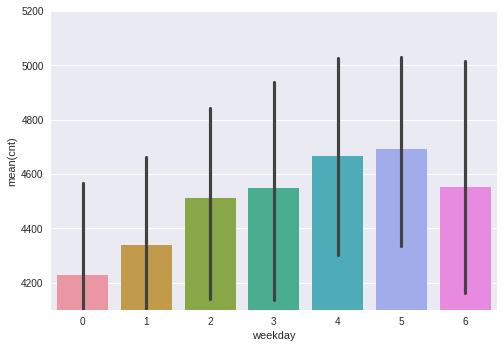

In [195]:
so.barplot(x="weekday", y="cnt", data=df)
plt.ylim(4100,5200)
# Starting from Sunday (sunday=0)
#avarage number of rented bikes in each day

(4200, 4800)

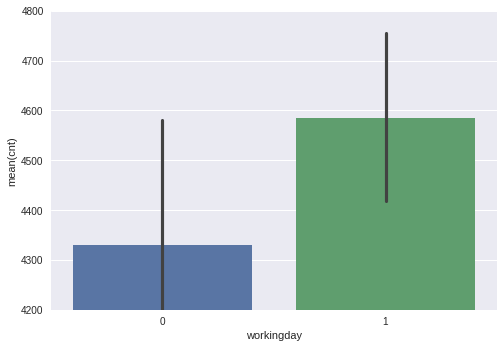

In [196]:
so.barplot(x="workingday", y="cnt", data=df,)
plt.ylim(4200,4800)
# 0 if day is weekend or holiday || 1 if day is working day
# =======
#avarage number of rented bikes in working days and non working days

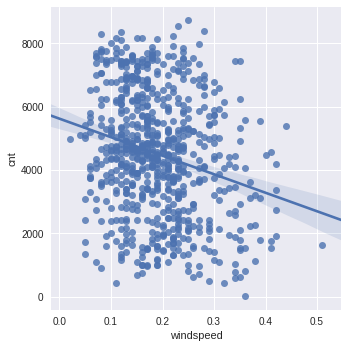

In [197]:
so.lmplot(x='windspeed',y='cnt',data=df)
#scatter plot visualising the relation between windspeed and number of rented bikes

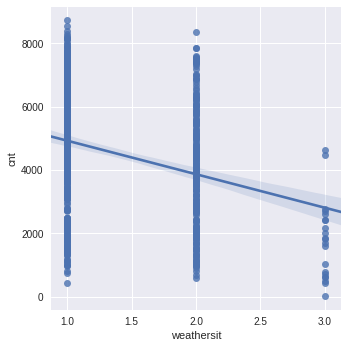

In [198]:
so.lmplot(x='weathersit',y='cnt',data=df)
#scatter plot visualising the relation between weather situation and number of rented bikes

(0.4, 1)

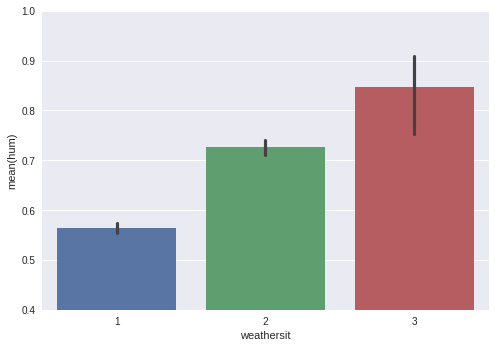

In [199]:
so.barplot(x='weathersit',y='hum',data=df)
plt.ylim(0.4,1)
#- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
#- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
#- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# =======
#avarage number of rented bikes in each weather situation

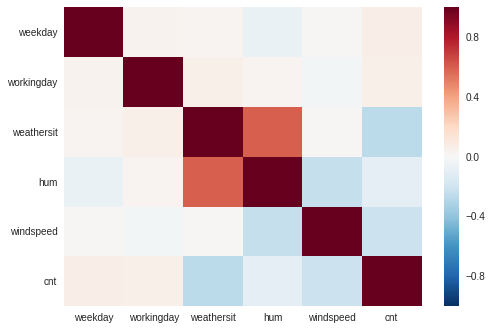

In [200]:
so.heatmap(df.corr(method ='spearman'))
#heat map visualising the correlation between every two variables using spearman method